<a href="https://colab.research.google.com/github/realyou0312/DeepLearning/blob/main/Kaggle_Daily_temper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/TimeSeries/city_temperature.csv")
data.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [ ]:
data['City'].value_counts()

Portland         18530
Charleston       18530
Springfield      18530
Washington DC    18530
Washington       18530
                 ...  
Frankfurt         4136
Flagstaff         3574
Pristina          3427
Yerevan           3226
Bonn              3133
Name: City, Length: 321, dtype: int64

In [ ]:
chennai = data[data["City"] == "Chennai (Madras)"]
chennai.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
331055,Asia,India,NaN,Chennai (Madras),1,1,1995,72.4
331056,Asia,India,NaN,Chennai (Madras),1,2,1995,73.5
331057,Asia,India,NaN,Chennai (Madras),1,3,1995,72.6
331058,Asia,India,NaN,Chennai (Madras),1,4,1995,75.2
331059,Asia,India,NaN,Chennai (Madras),1,5,1995,74.8


In [ ]:
chennai["Year"].value_counts()

2015    366
2012    366
2008    366
2016    366
1996    366
       ... 
2006    365
1998    365
2013    365
2019    365
2020    134
Name: Year, Length: 26, dtype: int64

In [ ]:
chennai["AvgTemperature"] = np.where(chennai["AvgTemperature"] == -99, np.nan, chennai["AvgTemperature"])
chennai.isnull().sum()

Region               0
Country              0
State             9266
City                 0
Month                0
Day                  0
Year                 0
AvgTemperature      29
dtype: int64

In [ ]:
chennai["AvgTemperature"] = chennai["AvgTemperature"].ffill()
chennai.isnull().sum()

Region               0
Country              0
State             9266
City                 0
Month                0
Day                  0
Year                 0
AvgTemperature       0
dtype: int64

In [ ]:
chennai.dtypes
chennai["Time_steps"] = pd.to_datetime((chennai.Year*10000 + chennai.Month*100 + chennai.Day).apply(str),format='%Y%m%d')
chennai.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Time_steps
331055,Asia,India,NaN,Chennai (Madras),1,1,1995,72.4,1995-01-01
331056,Asia,India,NaN,Chennai (Madras),1,2,1995,73.5,1995-01-02
331057,Asia,India,NaN,Chennai (Madras),1,3,1995,72.6,1995-01-03
331058,Asia,India,NaN,Chennai (Madras),1,4,1995,75.2,1995-01-04
331059,Asia,India,NaN,Chennai (Madras),1,5,1995,74.8,1995-01-05


In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    """to plot the series"""
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Year")
    plt.ylabel("Temprature")
    plt.grid(True)

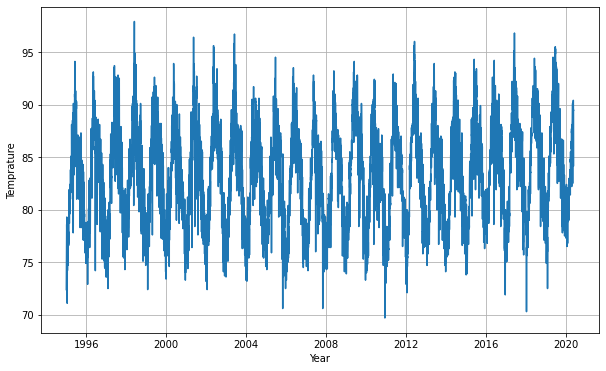

In [ ]:
time_step = chennai["Time_steps"].tolist()
temprature = chennai["AvgTemperature"].tolist()

series = np.array(temprature)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

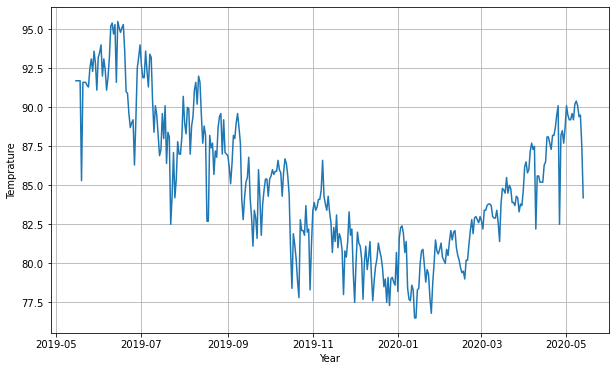

In [ ]:
#1년간의 데이터
plt.figure(figsize=(10, 6))
plot_series(time[-365:], series[-365:])

In [ ]:
split_time = 8000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [ ]:
naive_forecast = series[split_time - 1:-1]

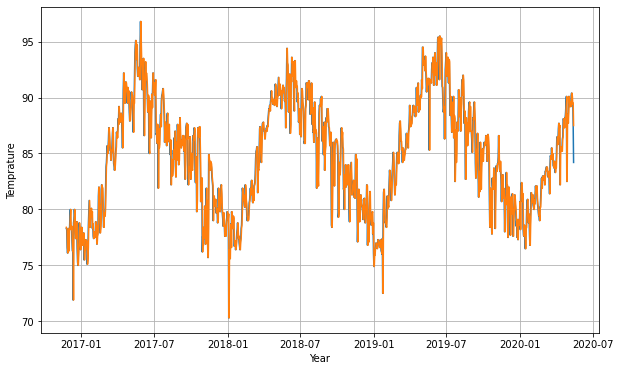

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

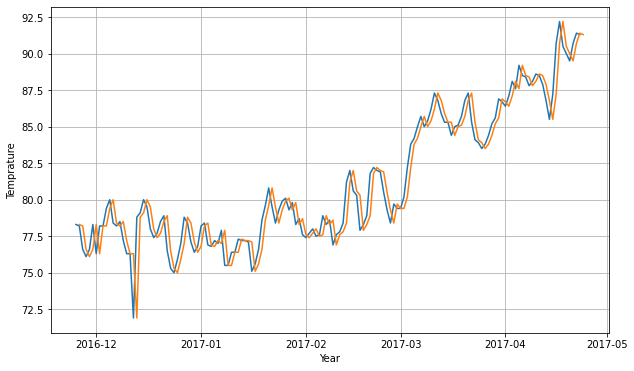

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

2.4476619273301727
1.0900473933649286


In [ ]:
def moving_average_forecast(series, window_size):
    """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time:time + window_size].mean())
    return np.array(forecast)

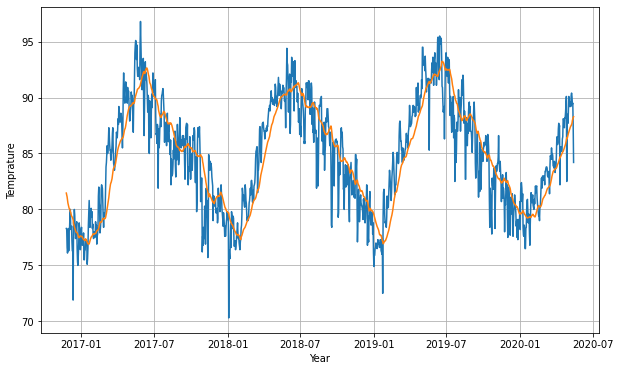

In [ ]:
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

5.458766745655611
1.841850974196946


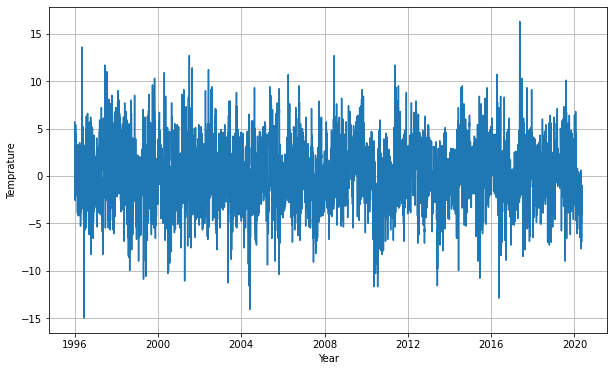

In [ ]:
#Differencing

diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()


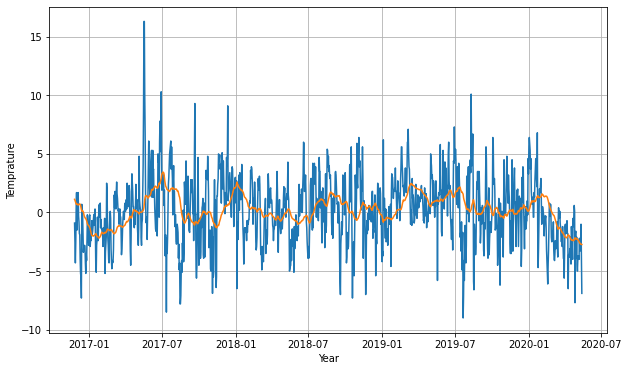

In [ ]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365:])
plot_series(time_valid, diff_moving_avg)
plt.show()

### Restoring trend and seasonality

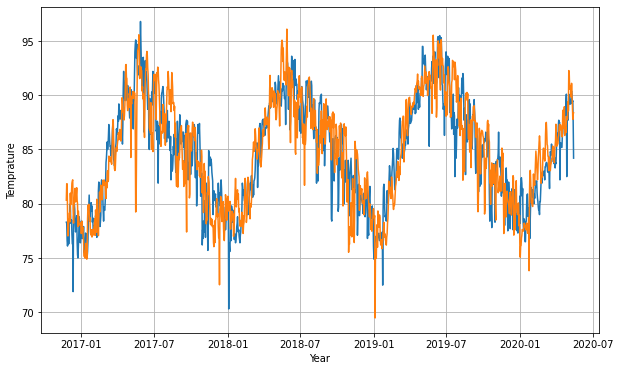

In [ ]:
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

7.969171658767771
2.1771153238546606


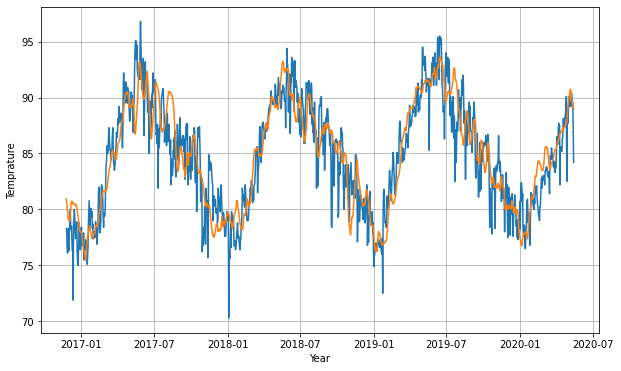

In [ ]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

5.630983364928909
1.8089115323854659


### Prepare a window dataset

In [ ]:
series1 = tf.expand_dims(series, axis=-1)
ds = tf.data.Dataset.from_tensor_slices(series1[:20])
for val in ds:
    print(val.numpy())

[72.4]
[73.5]
[72.6]
[75.2]
[74.8]
[76.4]
[78.4]
[78.6]
[78.1]
[79.3]
[77.9]
[79.]
[73.4]
[76.7]
[73.7]
[77.]
[71.1]
[72.6]
[76.1]
[75.7]


In [ ]:
dataset = ds.window(5, shift=1)
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end=" ")
    print()

[72.4] [73.5] [72.6] [75.2] [74.8] 
[73.5] [72.6] [75.2] [74.8] [76.4] 
[72.6] [75.2] [74.8] [76.4] [78.4] 
[75.2] [74.8] [76.4] [78.4] [78.6] 
[74.8] [76.4] [78.4] [78.6] [78.1] 
[76.4] [78.4] [78.6] [78.1] [79.3] 
[78.4] [78.6] [78.1] [79.3] [77.9] 
[78.6] [78.1] [79.3] [77.9] [79.] 
[78.1] [79.3] [77.9] [79.] [73.4] 
[79.3] [77.9] [79.] [73.4] [76.7] 
[77.9] [79.] [73.4] [76.7] [73.7] 
[79.] [73.4] [76.7] [73.7] [77.] 
[73.4] [76.7] [73.7] [77.] [71.1] 
[76.7] [73.7] [77.] [71.1] [72.6] 
[73.7] [77.] [71.1] [72.6] [76.1] 
[77.] [71.1] [72.6] [76.1] [75.7] 
[71.1] [72.6] [76.1] [75.7] 
[72.6] [76.1] [75.7] 
[76.1] [75.7] 
[75.7] 


In [ ]:
#Drop reminder set to True will drop the variables

dataset = ds.window(5, shift=1, drop_remainder=True)
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end=" ")
    print()

[72.4] [73.5] [72.6] [75.2] [74.8] 
[73.5] [72.6] [75.2] [74.8] [76.4] 
[72.6] [75.2] [74.8] [76.4] [78.4] 
[75.2] [74.8] [76.4] [78.4] [78.6] 
[74.8] [76.4] [78.4] [78.6] [78.1] 
[76.4] [78.4] [78.6] [78.1] [79.3] 
[78.4] [78.6] [78.1] [79.3] [77.9] 
[78.6] [78.1] [79.3] [77.9] [79.] 
[78.1] [79.3] [77.9] [79.] [73.4] 
[79.3] [77.9] [79.] [73.4] [76.7] 
[77.9] [79.] [73.4] [76.7] [73.7] 
[79.] [73.4] [76.7] [73.7] [77.] 
[73.4] [76.7] [73.7] [77.] [71.1] 
[76.7] [73.7] [77.] [71.1] [72.6] 
[73.7] [77.] [71.1] [72.6] [76.1] 
[77.] [71.1] [72.6] [76.1] [75.7] 


In [ ]:
# Flat

dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
for window in dataset:
    print(window.numpy())

[[72.4]
 [73.5]
 [72.6]
 [75.2]
 [74.8]]
[[73.5]
 [72.6]
 [75.2]
 [74.8]
 [76.4]]
[[72.6]
 [75.2]
 [74.8]
 [76.4]
 [78.4]]
[[75.2]
 [74.8]
 [76.4]
 [78.4]
 [78.6]]
[[74.8]
 [76.4]
 [78.4]
 [78.6]
 [78.1]]
[[76.4]
 [78.4]
 [78.6]
 [78.1]
 [79.3]]
[[78.4]
 [78.6]
 [78.1]
 [79.3]
 [77.9]]
[[78.6]
 [78.1]
 [79.3]
 [77.9]
 [79. ]]
[[78.1]
 [79.3]
 [77.9]
 [79. ]
 [73.4]]
[[79.3]
 [77.9]
 [79. ]
 [73.4]
 [76.7]]
[[77.9]
 [79. ]
 [73.4]
 [76.7]
 [73.7]]
[[79. ]
 [73.4]
 [76.7]
 [73.7]
 [77. ]]
[[73.4]
 [76.7]
 [73.7]
 [77. ]
 [71.1]]
[[76.7]
 [73.7]
 [77. ]
 [71.1]
 [72.6]]
[[73.7]
 [77. ]
 [71.1]
 [72.6]
 [76.1]]
[[77. ]
 [71.1]
 [72.6]
 [76.1]
 [75.7]]


In [ ]:
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x,y in dataset:
    print(x.numpy(), y.numpy())

[[72.4]
 [73.5]
 [72.6]
 [75.2]] [[74.8]]
[[73.5]
 [72.6]
 [75.2]
 [74.8]] [[76.4]]
[[72.6]
 [75.2]
 [74.8]
 [76.4]] [[78.4]]
[[75.2]
 [74.8]
 [76.4]
 [78.4]] [[78.6]]
[[74.8]
 [76.4]
 [78.4]
 [78.6]] [[78.1]]
[[76.4]
 [78.4]
 [78.6]
 [78.1]] [[79.3]]
[[78.4]
 [78.6]
 [78.1]
 [79.3]] [[77.9]]
[[78.6]
 [78.1]
 [79.3]
 [77.9]] [[79.]]
[[78.1]
 [79.3]
 [77.9]
 [79. ]] [[73.4]]
[[79.3]
 [77.9]
 [79. ]
 [73.4]] [[76.7]]
[[77.9]
 [79. ]
 [73.4]
 [76.7]] [[73.7]]
[[79. ]
 [73.4]
 [76.7]
 [73.7]] [[77.]]
[[73.4]
 [76.7]
 [73.7]
 [77. ]] [[71.1]]
[[76.7]
 [73.7]
 [77. ]
 [71.1]] [[72.6]]
[[73.7]
 [77. ]
 [71.1]
 [72.6]] [[76.1]]
[[77. ]
 [71.1]
 [72.6]
 [76.1]] [[75.7]]


In [ ]:
# Shuffle

dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
for x,y in dataset:
    print(x.numpy(), y.numpy())

[[78.4]
 [78.6]
 [78.1]
 [79.3]] [[77.9]]
[[72.6]
 [75.2]
 [74.8]
 [76.4]] [[78.4]]
[[78.6]
 [78.1]
 [79.3]
 [77.9]] [[79.]]
[[76.4]
 [78.4]
 [78.6]
 [78.1]] [[79.3]]
[[78.1]
 [79.3]
 [77.9]
 [79. ]] [[73.4]]
[[73.4]
 [76.7]
 [73.7]
 [77. ]] [[71.1]]
[[73.5]
 [72.6]
 [75.2]
 [74.8]] [[76.4]]
[[79.3]
 [77.9]
 [79. ]
 [73.4]] [[76.7]]
[[79. ]
 [73.4]
 [76.7]
 [73.7]] [[77.]]
[[77.9]
 [79. ]
 [73.4]
 [76.7]] [[73.7]]
[[72.4]
 [73.5]
 [72.6]
 [75.2]] [[74.8]]
[[73.7]
 [77. ]
 [71.1]
 [72.6]] [[76.1]]
[[75.2]
 [74.8]
 [76.4]
 [78.4]] [[78.6]]
[[77. ]
 [71.1]
 [72.6]
 [76.1]] [[75.7]]
[[74.8]
 [76.4]
 [78.4]
 [78.6]] [[78.1]]
[[76.7]
 [73.7]
 [77. ]
 [71.1]] [[72.6]]


In [ ]:
# Batch

dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
for x,y in dataset:
    print("x = ", x.numpy())
    print("y = ", y.numpy())
    print("*"*25)

x =  [[[79.3]
  [77.9]
  [79. ]
  [73.4]]

 [[72.6]
  [75.2]
  [74.8]
  [76.4]]]
y =  [[[76.7]]

 [[78.4]]]
*************************
x =  [[[77.9]
  [79. ]
  [73.4]
  [76.7]]

 [[78.6]
  [78.1]
  [79.3]
  [77.9]]]
y =  [[[73.7]]

 [[79. ]]]
*************************
x =  [[[75.2]
  [74.8]
  [76.4]
  [78.4]]

 [[76.4]
  [78.4]
  [78.6]
  [78.1]]]
y =  [[[78.6]]

 [[79.3]]]
*************************
x =  [[[73.5]
  [72.6]
  [75.2]
  [74.8]]

 [[79. ]
  [73.4]
  [76.7]
  [73.7]]]
y =  [[[76.4]]

 [[77. ]]]
*************************
x =  [[[74.8]
  [76.4]
  [78.4]
  [78.6]]

 [[73.7]
  [77. ]
  [71.1]
  [72.6]]]
y =  [[[78.1]]

 [[76.1]]]
*************************
x =  [[[78.1]
  [79.3]
  [77.9]
  [79. ]]

 [[76.7]
  [73.7]
  [77. ]
  [71.1]]]
y =  [[[73.4]]

 [[72.6]]]
*************************
x =  [[[72.4]
  [73.5]
  [72.6]
  [75.2]]

 [[77. ]
  [71.1]
  [72.6]
  [76.1]]]
y =  [[[74.8]]

 [[75.7]]]
*************************
x =  [[[78.4]
  [78.6]
  [78.1]
  [79.3]]

 [[73.4]
  [76.7]
 

In [ ]:
window_size = 60
batch_size = 32
shuffle_buffer_size = 1000

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """
    To create a window dataset given a numpy as input
    
    Returns: A prefetched tensorflow dataset
    """
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(8000,)
Epoch 1/100
31/31 [==============================] - 35s 33ms/step - loss: 62.3319 - mae: 62.8319
Epoch 2/100
31/31 [==============================] - 1s 35ms/step - loss: 52.4455 - mae: 52.9455
Epoch 3/100
31/31 [==============================] - 1s 35ms/step - loss: 40.2045 - mae: 40.7045
Epoch 4/100
31/31 [==============================] - 1s 36ms/step - loss: 26.6710 - mae: 27.1710
Epoch 5/100
31/31 [==============================] - 1s 38ms/step - loss: 11.9767 - mae: 12.4708
Epoch 6/100
31/31 [==============================] - 1s 35ms/step - loss: 6.2791 - mae: 6.7512
Epoch 7/100
31/31 [==============================] - 1s 36ms/step - loss: 6.0639 - mae: 6.5370
Epoch 8/100
31/31 [==============================] - 1s 36ms/step - loss: 6.0171 - mae: 6.4897
Epoch 9/100
31/31 [==============================] - 1s 36ms/step - loss: 5.9621 - mae: 6.4348
Epoch 10/100
31/31 [============

(1e-08, 0.0001, 0.0, 60.0)

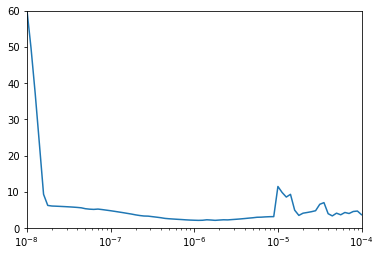

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

Epoch 1/500
80/80 [==============================] - 5s 22ms/step - loss: 45.0430 - mae: 45.5373
Epoch 2/500
80/80 [==============================] - 1s 17ms/step - loss: 6.6129 - mae: 7.0905
Epoch 3/500
80/80 [==============================] - 1s 17ms/step - loss: 6.1011 - mae: 6.5774
Epoch 4/500
80/80 [==============================] - 1s 17ms/step - loss: 5.6557 - mae: 6.1304
Epoch 5/500
80/80 [==============================] - 1s 17ms/step - loss: 5.2734 - mae: 5.7471
Epoch 6/500
80/80 [==============================] - 2s 18ms/step - loss: 4.9264 - mae: 5.3989
Epoch 7/500
80/80 [==============================] - 2s 18ms/step - loss: 4.6110 - mae: 5.0817
Epoch 8/500
80/80 [==============================] - 1s 17ms/step - loss: 4.3291 - mae: 4.7981
Epoch 9/500
80/80 [==============================] - 2s 18ms/step - loss: 4.0742 - mae: 4.5418
Epoch 10/500
80/80 [==============================] - 2s 18ms/step - loss: 3.9037 - mae: 4.3700
Epoch 11/500
80/80 [===========================

In [ ]:
def model_forecast(model, series, window_size):

    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [ ]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

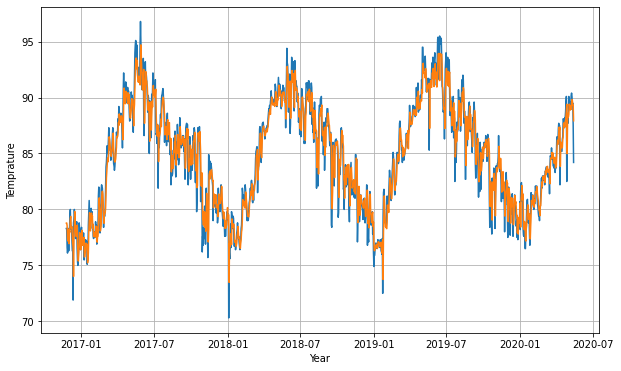

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

1.0756403

<Figure size 432x288 with 0 Axes>

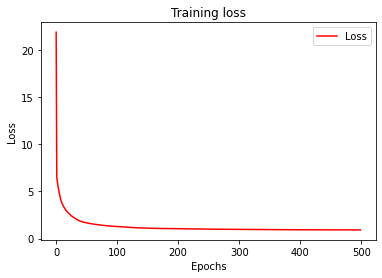

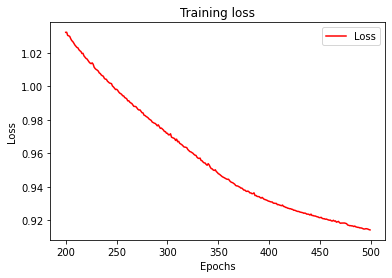

<Figure size 432x288 with 0 Axes>

In [ ]:
loss=history.history['loss']

epochs=range(len(loss)) 
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)


plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()